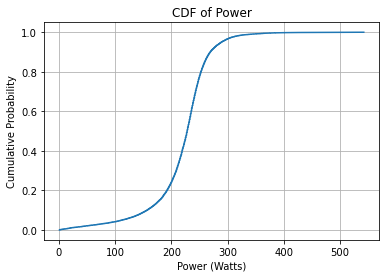

In [1]:
import fitparse
import numpy as np
import matplotlib.pyplot as plt

def load_power_data(fit_file):
    power_data = []

    for record in fitfile.messages:
        if record.name == 'record':
            power = record.get_value('power')
            if power:
                power_data.append(power)

    return power_data

def plot_power_cdf(power_data):
    sorted_data = np.sort(power_data)
    p = 1. * np.arange(len(sorted_data)) / (len(sorted_data) - 1)

    plt.plot(sorted_data, p)
    plt.xlabel('Power (Watts)')
    plt.ylabel('Cumulative Probability')
    plt.title('CDF of Power')
    plt.grid(True)
    plt.show()

fitfile = fitparse.FitFile('2024-11-12-065535-ELEMNT ROAM 8055-155-0.fit')
power_data = load_power_data(fitfile)
plot_power_cdf(power_data)

In [2]:
import pandas as pd

def extract_data_to_dataframe(fitfile):
    data = []

    for record in fitfile.messages:
        if record.name == 'record':
            row_data = {}
            for field in record.fields:
                row_data[field.name] = field.value
            data.append(row_data)

    df = pd.DataFrame(data)
    position_scale = (1 << 32) / 360.0
    df['position_lat'] = df['position_lat'] / position_scale
    df['position_long'] = df['position_long'] / position_scale
    return df

ride_df = extract_data_to_dataframe(fitfile)
ride_df

,timestamp,position_lat,position_long,gps_accuracy,distance,enhanced_speed,speed,calories,cadence,power,...,right_pedal_smoothness,left_torque_effectiveness,right_torque_effectiveness,battery_soc,temperature,enhanced_altitude,altitude,grade,ascent,descent
0,2024-11-12 06:55:35,48.810226,9.163252,23.0,0.00,1.603,1.603,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-12 06:55:36,48.810236,9.163212,24.0,3.24,1.923,1.923,0.0,44.0,231.0,...,22.0,92.0,97.5,98.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-11-12 06:55:37,48.810247,9.163171,26.0,6.47,2.244,2.244,0.0,46.0,225.0,...,25.5,92.5,96.0,NaN,21.0,NaN,NaN,NaN,NaN,NaN
3,2024-11-12 06:55:38,48.810257,9.163134,29.0,9.54,2.676,2.676,0.0,49.0,217.0,...,29.5,93.5,94.5,NaN,21.0,NaN,NaN,NaN,NaN,NaN
4,2024-11-12 06:55:39,48.810272,9.163093,32.0,12.94,2.932,2.932,0.0,52.0,196.0,...,29.5,92.5,92.5,NaN,21.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23705,2024-11-12 14:52:34,NaN,NaN,NaN,173351.73,NaN,NaN,4469.0,0.0,0.0,...,NaN,NaN,NaN,NaN,4.0,411.2,411.2,-7.10,2487.0,2409.0
23706,2024-11-12 14:52:35,NaN,NaN,NaN,173351.73,NaN,NaN,4469.0,0.0,0.0,...,NaN,NaN,NaN,NaN,4.0,411.2,411.2,-6.70,2487.0,2409.0
23707,2024-11-12 14:52:36,NaN,NaN,NaN,173351.73,NaN,NaN,4469.0,0.0,0.0,...,NaN,NaN,NaN,NaN,4.0,411.2,411.2,-6.12,2487.0,2409.0
23708,2024-11-12 14:52:37,NaN,NaN,NaN,173351.73,NaN,NaN,4469.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,411.2,411.2,-5.30,2487.0,2409.0


In [3]:
ride_df.columns

Index(['timestamp', 'position_lat', 'position_long', 'gps_accuracy',
       'distance', 'enhanced_speed', 'speed', 'calories', 'cadence', 'power',
       'left_right_balance', 'left_pedal_smoothness', 'right_pedal_smoothness',
       'left_torque_effectiveness', 'right_torque_effectiveness',
       'battery_soc', 'temperature', 'enhanced_altitude', 'altitude', 'grade',
       'ascent', 'descent'],
      dtype='object')

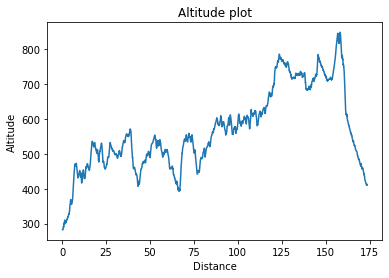

In [4]:

plt.plot(ride_df['distance'].to_numpy() / 1000.0, ride_df['altitude'].to_numpy())
plt.title('Altitude plot')
plt.xlabel('Distance')
plt.ylabel('Altitude')
plt.show()

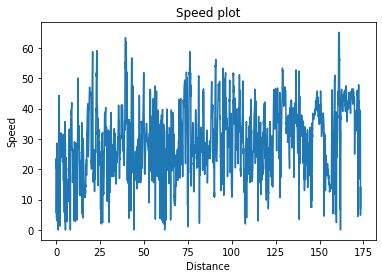

In [5]:

speed = ride_df['speed'].to_numpy()*3.6
plt.plot(ride_df['distance'].to_numpy() / 1000.0, speed)
plt.title('Speed plot')
plt.xlabel('Distance')
plt.ylabel('Speed')
plt.show()

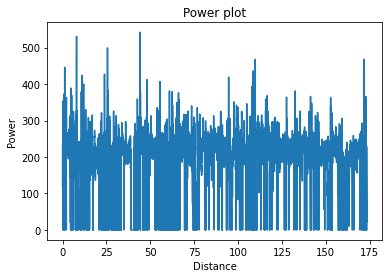

In [6]:
plt.plot(ride_df['distance'].to_numpy() / 1000.0, ride_df.power.to_numpy())
plt.title('Power plot')
plt.xlabel('Distance')
plt.ylabel('Power')
plt.show()

In [7]:
from sqlmodel import SQLModel
import pandas
import json
from typing import Optional

class PowerSummary(SQLModel):
    average_power: float | None
    median_power: float | None
    total_work: float | None
    # JSON encoded array of 101 position 0..100, with the power quantiles
    quantiles: Optional[str] = None

class ActivitySummary(SQLModel):
    distance: float | None
    total_elapsed_time: float | None
    active_time: float | None
    elevation_gain: float | None
    average_speed: float | None
    power_summary: Optional[PowerSummary] = None

class Climb(SQLModel):
    from_ix: int | None
    to_ix: int | None
    elevation: float | None



def compute_elevation_gain_intervals(df: pandas.DataFrame, tolerance=1.0, min_elev=1.0):
    altitude_series = df.altitude.dropna()
    altitude = altitude_series.to_list()
    original_ix = altitude_series.index
    #print(len(original_ix), len(altitude))
    climbs = []
    high_ix = low_ix = 0
    for i, h in enumerate(altitude):
        if h < altitude[low_ix]:
            low_ix = i
        if h > altitude[high_ix]:
            high_ix = i
        if h < (altitude[high_ix] - tolerance):
            # It means we are going down again
            climb = Climb(
                from_ix=original_ix[low_ix],
                to_ix=original_ix[high_ix],
                elevation=altitude[high_ix] - altitude[low_ix]
            )
            #print(low_ix, high_ix, climb)
            if climb.from_ix < climb.to_ix and climb.elevation > min_elev:
                climbs.append(climb)
            low_ix = i
            high_ix = i
    return climbs

def compute_elevation_gain(df: pandas.DataFrame, tolerance: float, min_elev: float):
    segments = compute_elevation_gain_intervals(df, tolerance, min_elev)
    return sum(map(lambda x: x.elevation, segments))

def compute_activity_summary(df: pandas.DataFrame):
    total_time = len(ride_df)
    summary = ActivitySummary(
        distance=ride_df['distance'].iloc[-1] / 1000,
        total_elapsed_time=(ride_df['timestamp'].iloc[-1] - ride_df['timestamp'][0]).seconds,
        active_time=total_time,
        elevation_gain=compute_elevation_gain(df, tolerance=2, min_elev=4.0),
        average_speed=ride_df['speed'].mean() * 3.6  # From m/s to km/h
    )
    if 'power' in df.columns:
        work = df.power.sum()
        quantiles = df.power.quantile(np.arange(0, 101)/100)
        summary.power_summary = PowerSummary(
            average_power = work / total_time,
            median_power = quantiles.iloc[50],
            total_work = work / 1000,  # to KJ instad of Joules
            quantiles = json.dumps(quantiles.to_list())
        )
    return summary

#compute_elevation_gain(ride_df, tolerance=2.0, min_elev=5.0)
compute_activity_summary(ride_df)

ActivitySummary(distance=173.35173, total_elapsed_time=28623.0, active_time=23710.0, elevation_gain=2485.799999999999, average_speed=26.222944791798508, power_summary=PowerSummary(average_power=188.26431885280473, median_power=221.0, total_work=4463.747, quantiles='[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 22.0, 54.0, 84.0, 106.0, 122.0, 134.0, 144.0, 152.0, 159.0, 165.0, 170.0, 175.0, 179.0, 183.0, 186.0, 189.0, 192.0, 194.0, 196.0, 198.0, 200.0, 202.0, 204.0, 206.0, 207.0, 209.0, 210.0, 212.0, 213.0, 214.0, 215.0, 217.0, 218.0, 219.0, 220.0, 221.0, 222.0, 223.0, 224.0, 225.0, 226.0, 227.0, 228.0, 229.0, 230.0, 231.0, 232.0, 232.0, 233.0, 234.0, 235.0, 236.0, 236.0, 237.0, 238.0, 239.0, 240.0, 241.0, 242.0, 243.0, 244.0, 245.0, 246.0, 247.0, 248.0, 249.0, 250.0, 252.0, 253.0, 254.0, 256.0, 257.0, 259.0, 261.0, 263.0, 265.0, 268.0, 271.0, 275.0, 280.0, 285.0, 291.0, 299.0, 310.27999999999884, 336.0, 542.0]'))

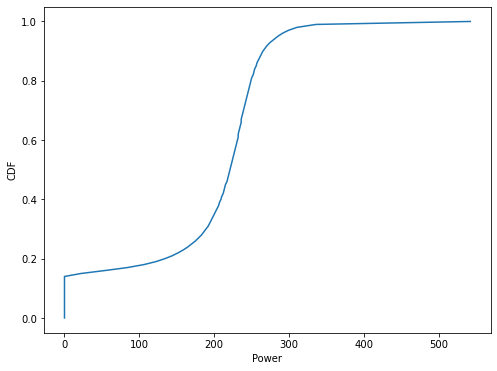

In [8]:
summary = compute_activity_summary(ride_df)

power_quantiles = json.loads(summary.power_summary.quantiles)
y_quantiles = np.arange(0, 101) / 100.0
plt.figure(figsize=(8, 6))
plt.xlabel('Power')
plt.ylabel('CDF')
plt.plot(power_quantiles, y_quantiles)
plt.show()

In [9]:
compute_elevation_gain(ride_df, tolerance=30.0, min_elev=100.0)

1236.6

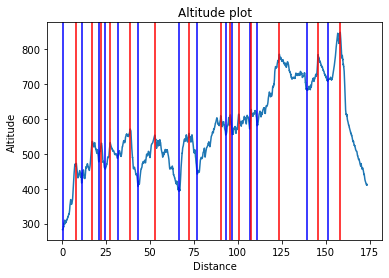

In [11]:
climbs = compute_elevation_gain_intervals(ride_df, tolerance=30.0, min_elev=50.0)
#climbs = compute_elevation_gain_intervals(ride_df, tolerance=2, min_elev=5)

plt.plot(ride_df['distance'].to_numpy() / 1000.0, ride_df['altitude'].to_numpy())
for climb in climbs:
    plt.axvline(x=ride_df.distance[climb.from_ix]/1000, color='b')
    plt.axvline(x=ride_df.distance[climb.to_ix]/1000, color='r')
plt.title('Altitude plot')
plt.xlabel('Distance')
plt.ylabel('Altitude')
plt.show()

In [20]:
ride_df.to_json()[0:200]

'{"timestamp":{"0":1731394535000,"1":1731394536000,"2":1731394537000,"3":1731394538000,"4":1731394539000,"5":1731394540000,"6":1731394541000,"7":1731394542000,"8":1731394543000,"9":1731394544000,"10":1'

In [19]:
import kaleido
import plotly
import plotly.express as px

fig = px.line_map(ride_df, lat="position_lat", lon="position_long", zoom=7, height=600)
fig.update_layout(mapbox_style="open-street-map")
image_bytes = fig.to_image(format='jpg')
fig.show()

ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


In [18]:
import pandas as pd

us_cities = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/us-cities-top-1k.csv")
us_cities = us_cities.query("State in ['New York', 'Ohio']")

import plotly.express as px

fig = px.line_map(us_cities, lat="lat", lon="lon", color="State", zoom=3, height=300)

fig.update_layout(map_style="open-street-map", map_zoom=4, map_center_lat = 41,
    margin={"r":0,"t":0,"l":0,"b":0})

fig.show()

In [34]:
import io
import pyarrow.feather as feather
from typing import Sequence

def remove_columns(df: pandas.DataFrame, cols: Sequence[str]):
    keep_cols = [x for x in df.columns if not x in set(cols)]
    return df[keep_cols]

def serialize_dataframe(df: pandas.DataFrame):
    rem_cols = ['left_right_balance']
    with io.BytesIO() as buffer:
        remove_columns(df, rem_cols).to_feather(buffer)
        serialized = buffer.getvalue()
    return serialized

def deserialize_dataframe(serialized: bytes):
    return feather.read_feather(io.BytesIO(serialized))

tmp = serialize_dataframe(ride_df)

In [35]:
len(tmp)

1391522

In [36]:
deserialize_dataframe(tmp)

,timestamp,position_lat,position_long,gps_accuracy,distance,enhanced_speed,speed,calories,cadence,power,...,right_pedal_smoothness,left_torque_effectiveness,right_torque_effectiveness,battery_soc,temperature,enhanced_altitude,altitude,grade,ascent,descent
0,2024-11-12 06:55:35,48.810226,9.163252,23.0,0.00,1.603,1.603,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-12 06:55:36,48.810236,9.163212,24.0,3.24,1.923,1.923,0.0,44.0,231.0,...,22.0,92.0,97.5,98.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-11-12 06:55:37,48.810247,9.163171,26.0,6.47,2.244,2.244,0.0,46.0,225.0,...,25.5,92.5,96.0,NaN,21.0,NaN,NaN,NaN,NaN,NaN
3,2024-11-12 06:55:38,48.810257,9.163134,29.0,9.54,2.676,2.676,0.0,49.0,217.0,...,29.5,93.5,94.5,NaN,21.0,NaN,NaN,NaN,NaN,NaN
4,2024-11-12 06:55:39,48.810272,9.163093,32.0,12.94,2.932,2.932,0.0,52.0,196.0,...,29.5,92.5,92.5,NaN,21.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23705,2024-11-12 14:52:34,NaN,NaN,NaN,173351.73,NaN,NaN,4469.0,0.0,0.0,...,NaN,NaN,NaN,NaN,4.0,411.2,411.2,-7.10,2487.0,2409.0
23706,2024-11-12 14:52:35,NaN,NaN,NaN,173351.73,NaN,NaN,4469.0,0.0,0.0,...,NaN,NaN,NaN,NaN,4.0,411.2,411.2,-6.70,2487.0,2409.0
23707,2024-11-12 14:52:36,NaN,NaN,NaN,173351.73,NaN,NaN,4469.0,0.0,0.0,...,NaN,NaN,NaN,NaN,4.0,411.2,411.2,-6.12,2487.0,2409.0
23708,2024-11-12 14:52:37,NaN,NaN,NaN,173351.73,NaN,NaN,4469.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,411.2,411.2,-5.30,2487.0,2409.0
